# Clustering and Mixture Model

* Clustering is a Machine Learning technique that involves the grouping of data points. Given a set of data points, we can use a clustering algorithm to classify each data point into a specific group. In theory, data points that are in the same group should have similar properties and/or features, while data points in different groups should have highly dissimilar properties and/or features. Clustering is a method of unsupervised learning and is a common technique for statistical data analysis used in many fields

# Goals of Clustering

1. Data Exploration  
   * Are there coherent groups and how many groups are there?

2. Data Partitioning
    * Divide data by group before further processing
3. Unsupervised feature extraction
    * Derive features from clusters or cluster distance
4. Evaluation and parameter tuning
    * Quantitative measures of limited use
    * Usually qualitative measure used
    * Best: downstream tasks
    * What is your goal?
    
    

# Clustering Algorithms

1. K-Means clustering
    * K-Means is probably the most well-known clustering algorithm. It’s taught in a lot of introductory data science and machine learning classes. It’s easy to understand and implement in code! Check out the graphic below for an illustration.

# K-Means algorithm
 * Pick number of clusters k.
 * pick k random points as
 
         "cluster center"
 * while cluster centers
              change
       1. Assign each data point to it's closest cluster center
       
       2. Recompute cluster centers as the mean of the assigned points.

# Advantages :
* K-Means has the advantage that it’s pretty fast, as all we’re really doing is computing the distances between points and group centers; very few computations! It thus has a linear complexity O(n).
       
# Limitations of K-Means

1. Cluster boundaries equidistant to centers i.e the division between the clusters is always at the middle of each clusters, hence may miscluster some data points

2. Can't model covariances well

3. Only simple cluster shapes can be caption.. spiral shapes can't be caption

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
df = pd.read_csv('income_clustering.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


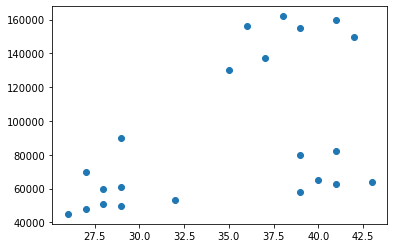

In [10]:
# ploting on a scatter plot
plt.scatter(df['Age'], df['Income($)'])

In [17]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [18]:
y_predicted = km.fit_predict(df[['Age']], df[['Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0])

In [19]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


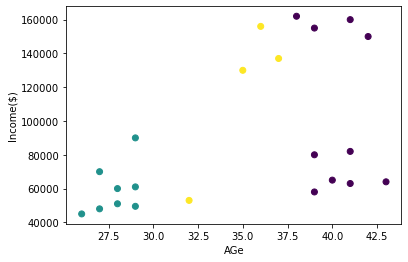

In [22]:
plt.scatter(df['Age'], df['Income($)'], c=df.cluster)
plt.ylabel('Income($)')
plt.xlabel('AGe')
plt.show()

* From the plot above our clustering in not proper, we need to scale our data first for proper clustering and grouping

# using minmaxScalar()

In [26]:
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

#for age
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0


In [27]:
# Repeating the KMeans we get

In [46]:
km2 = KMeans(n_clusters=3)
y_pred2 = km2.fit_predict(df[['Age', 'Income($)']])
y_pred2

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [47]:
df['pred2'] = y_pred2

In [48]:
km2.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

Text(0.5, 0, 'Age')

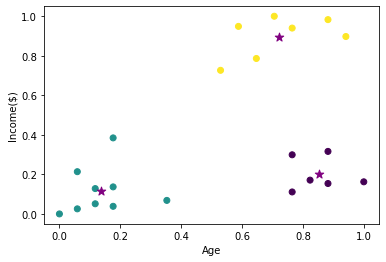

In [56]:
plt.scatter(df['Age'], df['Income($)'], c = df.pred2)

#centroids
plt.scatter(km2.cluster_centers_[:, 0], km2.cluster_centers_[:,1],
            c='purple', marker='*',s =80)
plt.ylabel('Income($)')
plt.xlabel('Age')

# Ploting the SSE (SUM OF SQUARE ERROR)

In [57]:
k_range = range(1,10)
sse = []
for k in k_range:
    km = KMeans(n_clusters =k)
    km.fit(df[['Age', 'Income($)']])
    sse.append(km.inertia_)

In [58]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.2105547899547249,
 0.16858512236029757,
 0.13717729016208893,
 0.10824862283029266]

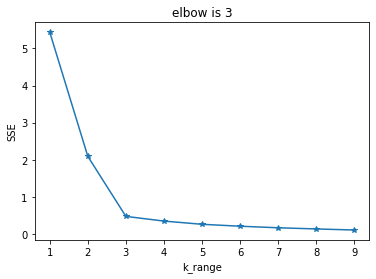

In [61]:
plt.plot(k_range, sse, marker = '*')
plt.xlabel('k_range')
plt.ylabel('SSE')
plt.title('elbow is 3')
plt.show()

# Other types of Clustering algorithm includes 

2. Agglomerative Hierarchical Clustering

3. Mean shift clustering:  is a sliding-window-based algorithm that attempts to find dense areas of data points. It is a centroid-based algorithm meaning that the goal is to locate the center points of each group/class, which works by updating candidates for center points to be the mean of the points within the sliding-window.
4. Density-Based Spatial Clustering of Applications with Noise (DBSCAN)